In [232]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from models.prepareData import getData, convertData, calcMinimumMaximum
from models.models import linearRegressionModel, PolynomialFeatures, lassoRegressionModel, ridgeRegressionModel
from models.models import RANSACRegressionModel, PolynomialRegressionModel, polynomialRegression

In [233]:
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Thọ', 'Phước Kiển', 'Nhà Bè')
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Cảnh', '22', 'Bình Thạnh')
# data = getData('Bán căn hộ chung cư', 'Bến Vân Đồn', '1', '4')
# data = getData('Bán đất', 'Trần Văn Giàu', 'Lê Minh Xuân', 'Bình Chánh')
data = getData('Bán đất', 'Vườn Lài', 'An Phú Đông', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán nhà riêng', 'Phạm Văn Chiêu', '9', 'Gò Vấp')
# data = getData('Bán nhà riêng', 'Nguyễn Văn Quá', 'Đông Hưng Thuận', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán nhà riêng', '3/2', '14', '10')
# data = getData('Bán đất', 'Nguyễn Thị Rành', 'Nhuận Đức', 'Củ Chi')
# data = getData('Bán đất', 'Tôn Đản', '10', '4')
# data = getData('Bán căn hộ chung cư', '9A', 'Bình Hưng', 'Bình Chánh')
# data = getData('Bán nhà riêng', 'Cao Thắng', '12', '10')
# data = getData('Bán đất', 'Bà Thiên', 'Nhuận Đức', 'Củ Chi')
# data = getData('Bán nhà riêng', 'Số 8', 'Linh Xuân', 'Thủ Đức')
# data = getData('Bán đất', 'Bình Mỹ', 'Bình Mỹ', 'Củ Chi')
# data = getData('Bán đất', 'Nguyễn Văn Tạo', 'Long Thới', 'Nhà Bè')
# data = getData('Bán nhà riêng', 'Lê Đình Cẩn', 'Tân Tạo', 'Bình Tân')
# data = getData('Bán đất', 'Hoàng Phan Thái', 'Bình Chánh', 'Bình Chánh')
# data = getData('Bán đất', 'Lê Văn Lương', 'Phước Kiển', 'Nhà Bè')

In [234]:
post_type = data['post_type'].iloc[0]
street = data['street'].iloc[0]
ward = data['ward'].iloc[0]
district = data['district'].iloc[0]

In [235]:
print("Data length: ", len(data))

Data length:  302


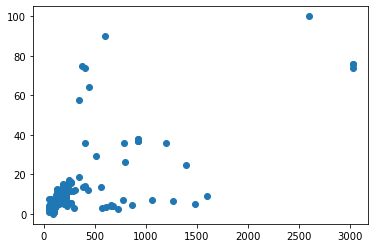

In [236]:
plt.scatter(data['area'], data['price'])
plt.show()

## Feature Engineering

### Clean data by observing dataset:

In [237]:
data = data[~(data['area'] < 10)]
data = data[~(data['price'] > 200)]

In [238]:
area_mean = np.mean(data['area'])
area_std = np.std(data['area'])

price_mean = np.mean(data['price'])
price_std = np.std(data['price'])

data = data[~( (data['area'] < area_mean) & (data['price'] > price_mean+1.5) )]
data = data[~( (data['area'] > area_mean) & (data['price'] < price_mean+1.5) )]

In [239]:
# print("Area mean: ", area_mean)
# print("Price mean: ", price_mean)

In [240]:
print("Data length: ", len(data))

Data length:  264


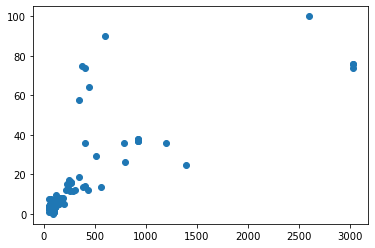

In [241]:
plt.scatter(data['area'], data['price'])
plt.show()

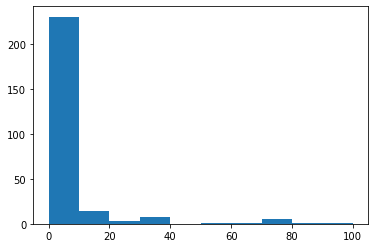

In [242]:
plt.hist(data['price'])
plt.show()

### Feature Scaling (both area & price)

In [243]:
# transform data into log1p
data['area'] = (data['area']).transform(np.log1p)
data['price'] = (data['price']).transform(np.log1p)

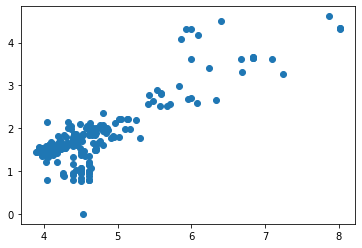

In [244]:
plt.scatter(data['area'], data['price'])
plt.show()

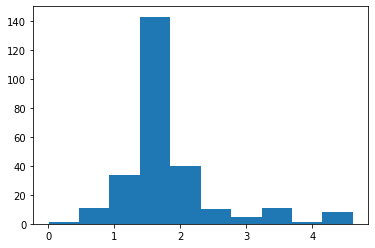

In [245]:
plt.hist(data['price'])
plt.show()

### Calculate mean of duplicated data

In [246]:
# Instead of drop duplicates try calc and use its mean value:
data = data.groupby(['area'], as_index=False).mean()

# sort data by area:
data = data.sort_values(by=['area'])

In [247]:
print("Data length: ", len(data))

Data length:  144


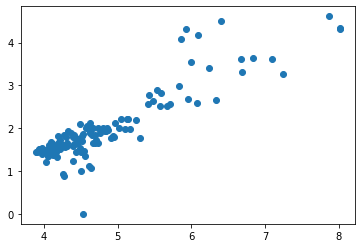

In [248]:
plt.scatter(data['area'], data['price'])
plt.show()

## RANSAC Algorithm in Detecting Outliers
- This method is not a good choice if the dataset not follow linear trends
- Beside, using a base estimator same with the current model will make this prediction in spoiled data => I assume that it is not a good practice

In [249]:
# test_area, test_price = convertData(data)

# # find degree by polynomial regression:
# run_model, model_name, found_degree, rmse = polynomialRegression(test_area, test_price)

# ransac_model = linear_model.RANSACRegressor(base_estimator=PolynomialRegressionModel(degree=found_degree), random_state=0)
# ransac_model.fit(test_area, test_price)

# inlier_mask = ransac_model.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

In [250]:
# plt.scatter(data['area'], data['price'], color='blue')
# plt.scatter(test_area[outlier_mask], test_price[outlier_mask], color='red')
# plt.plot(test_area, ransac_model.predict(test_area))
# # run_model.predict(PolynomialFeatures(degree=found_degree).fit_transform(test_area)
# plt.show()

# outlier_indexes = np.where(outlier_mask==True)
# outlier_values = data.iloc[outlier_indexes]
# data = data.drop(outlier_values.index)

### Use IQR method to remove outliers

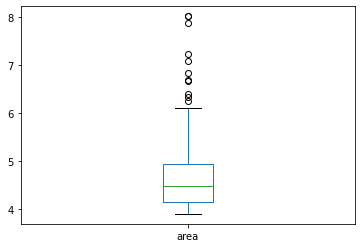

In [251]:
data['area'].plot(kind='box')
plt.show()

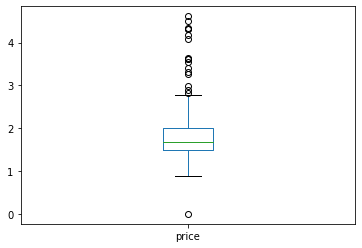

In [252]:
data['price'].plot(kind='box')
plt.show()

In [253]:
# Apply IQR method on area data:
area_minimum, area_maximum = calcMinimumMaximum(data['area'])
data = data[(data['area'] > area_minimum) & (data['area'] < area_maximum)]
data

,area,price
8,3.970292,1.389926
9,3.974058,1.536867
10,3.981549,1.510722
11,3.985273,1.492904
12,3.994524,1.458615
...,...,...
131,6.081534,2.582306
132,6.094698,4.176884
133,6.238910,3.417727
134,6.329721,2.670002


In [254]:
print("Length = ", len(data))
max_value = data['area'].iloc[len(data)-1]
min_value = data['area'].iloc[0]

print("Max: ", max_value)
print("Min: ", min_value)

frame_value = (max_value - min_value) / 5
print("frame_value = ", frame_value)

frames_data = [ data[(data['area'] >= i*frame_value+min_value) & (data['area'] <= (i+1)*frame_value+min_value)].copy() for i in range(0, 5)]
frames_data[-1] = frames_data[-1].append(data[data['area'] > 4*frame_value+min_value])

Length =  128
Max:  6.398594934535208
Min:  3.970291913552122
frame_value =  0.4856606041966171


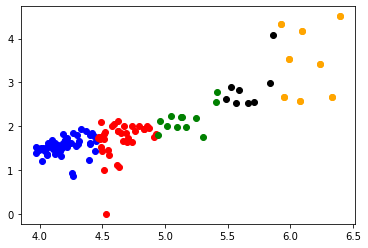

In [255]:
colors = ['blue', 'red', 'green', 'black', 'orange']
color_count = 0
for x in frames_data:
    plt.scatter(x['area'], x['price'], color=colors[color_count])
    color_count = color_count + 1
plt.show()

In [256]:
outliers = []
for i in range(len(frames_data)):
    price_minimum, price_maximum = calcMinimumMaximum(frames_data[i]['price'])
    print(price_minimum, " ", price_maximum)
    frames_inliers = frames_data[i].where((frames_data[i]['price'] > price_minimum) & (frames_data[i]['price'] < price_maximum))
    frames_outliers = frames_data[i].where((frames_data[i]['price'] <= price_minimum) | (frames_data[i]['price'] >= price_maximum))
    print(frames_data[i])
    frames_data[i] = frames_inliers.dropna()
    outliers.append(frames_outliers.dropna())
    
data = pd.concat(frames_data, ignore_index=True)
outliers_data = pd.concat(outliers, ignore_index=True)

1.2431070643495707   1.838235029951784
        area     price
8   3.970292  1.389926
9   3.974058  1.536867
10  3.981549  1.510722
11  3.985273  1.492904
12  3.994524  1.458615
..       ...       ...
66  4.403054  1.629241
67  4.415220  1.853352
68  4.430817  1.767659
69  4.442651  1.435764
70  4.454347  1.659076

[63 rows x 2 columns]
1.052593362662663   2.0616717992921156
         area     price
71   4.465908  1.722767
72   4.472781  1.751198
73   4.477337  1.755268
74   4.483003  1.704748
75   4.489759  1.538189
76   4.493121  2.091864
77   4.499810  1.435085
78   4.510860  1.004124
79   4.511958  1.704748
80   4.514151  1.829376
81   4.526127  1.869338
82   4.532599  0.001149
83   4.543295  1.470176
84   4.553877  1.350667
85   4.575741  2.014903
86   4.592085  2.054124
87   4.615121  1.117805
88   4.623992  1.887070
89   4.624973  1.902108
90   4.629863  2.112635
91   4.634729  1.064711
92   4.649187  1.840550
93   4.670021  1.654029
94   4.672829  2.014903
95   4.691348  1.840550

In [257]:
# plt.scatter(data['area'][:len(data)//5], data['price'][:len(data)//5], color='blue')
# plt.scatter(data['area'][len(data)//5:len(data)*2//5], data['price'][len(data)//5:len(data)*2//5], color='red')
# plt.scatter(data['area'][len(data)*2//5:len(data)*3//5], data['price'][len(data)*2//5:len(data)*3//5], color='green')
# plt.scatter(data['area'][len(data)*3//5:len(data)*4//5], data['price'][len(data)*3//5:len(data)*4//5], color='black')
# plt.scatter(data['area'][len(data)*4//5:], data['price'][len(data)*4//5:], color='purple')
# plt.show()

In [258]:
# part_data = data['price'][:len(data)//5]
# price_minimum, price_maximum = calcMinimumMaximum(part_data)
# data_1 = data[:len(data)//5][(part_data > price_minimum) & (part_data < price_maximum)]

# part_data = data['price'][len(data)//5:len(data)*2//5]
# price_minimum, price_maximum = calcMinimumMaximum(part_data)
# data_2 = data[len(data)//5:len(data)*2//5][(part_data > price_minimum) & (part_data < price_maximum)]

# part_data = data['price'][len(data)*2//5:len(data)*3//5]
# price_minimum, price_maximum = calcMinimumMaximum(part_data)
# data_3 = data[len(data)*2//5:len(data)*3//5][(part_data > price_minimum) & (part_data < price_maximum)]

# part_data = data['price'][len(data)*3//5:len(data)*4//5]
# price_minimum, price_maximum = calcMinimumMaximum(part_data)
# data_4 = data[len(data)*3//5:len(data)*4//5][(part_data > price_minimum) & (part_data < price_maximum)]

# part_data = data['price'][len(data)*4//5:]
# price_minimum, price_maximum = calcMinimumMaximum(part_data)
# data_5 = data[len(data)*4//5:][(part_data > price_minimum) & (part_data < price_maximum)]

# data = pd.concat([data_1, data_2, data_3, data_4, data_5], ignore_index=True)

In [259]:
print("Data length: ", len(data))
print("Outliers data length: ", len(outliers_data))

Data length:  115
Outliers data length:  21


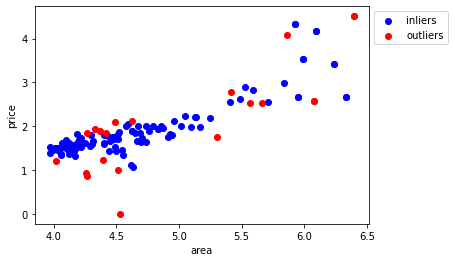

In [260]:
plt.scatter(data['area'], data['price'], color='blue', label='inliers')
plt.scatter(outliers_data['area'], outliers_data['price'], color='red', label='outliers')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel('area')
plt.ylabel('price')
plt.show()

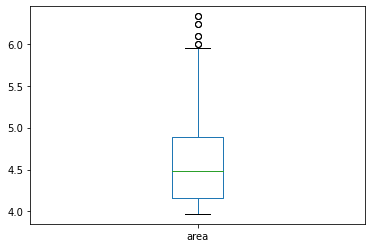

In [261]:
data['area'].plot(kind='box')
plt.show()

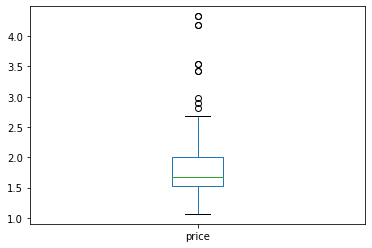

In [262]:
data['price'].plot(kind='box')
plt.show()

In [263]:
max_area = data['area'].max()
max_price = data['price'].max()

### Use Local Outlier Factor to remove _local outliers_

In [264]:
# from sklearn.neighbors import LocalOutlierFactor

# # convert dataframe into numpy array:
# X = data.to_numpy()
# n_neighbors = 8

In [265]:
# isNeighbors = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm='brute', metric='euclidean', contamination=0.2).fit_predict(X)

# # locate outliers by index:
# outlier_indexes = np.where(isNeighbors == -1)
# outlier_values = data.iloc[outlier_indexes]

# # drop outliers:
# data = data.drop(outlier_values.index)

# print("\nOutliers detected by Local Outlier Factor with n_neighbors = ", n_neighbors)
# # plot outliers removed:
# plt.scatter(data['area'], data['price'], color='blue', label='inliers')
# plt.scatter(outlier_values['area'], outlier_values['price'], color='red', label='outliers')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
# plt.tight_layout()
# plt.xlabel('area')
# plt.ylabel('price')
# plt.show()

### Split dataset
1. Train dataset: 70%
2. Validate dataset: 15%
3. Test dataset: 15%

In [266]:
# divide data into train and test:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=4)
test_data, validate_data = train_test_split(test_data, test_size=0.5, random_state=4)

In [267]:
# Sort data by area column:
train_data = train_data.sort_values(by=['area'])
test_data = test_data.sort_values(by=['area'])
validate_data = validate_data.sort_values(by=['area'])

print("\nTrain data length: ", len(train_data))
print("Test data length: ", len(test_data))
print("Validate data length: ", len(validate_data))


Train data length:  80
Test data length:  17
Validate data length:  18


### Visualize features relationship

In [268]:
# # convert data into numpy
X, Y = convertData(data)
X_train, Y_train = convertData(train_data)
X_test, Y_test = convertData(test_data)
X_validate, Y_validate = convertData(validate_data)

Text(0.5, 1.0, 'Y_validate')

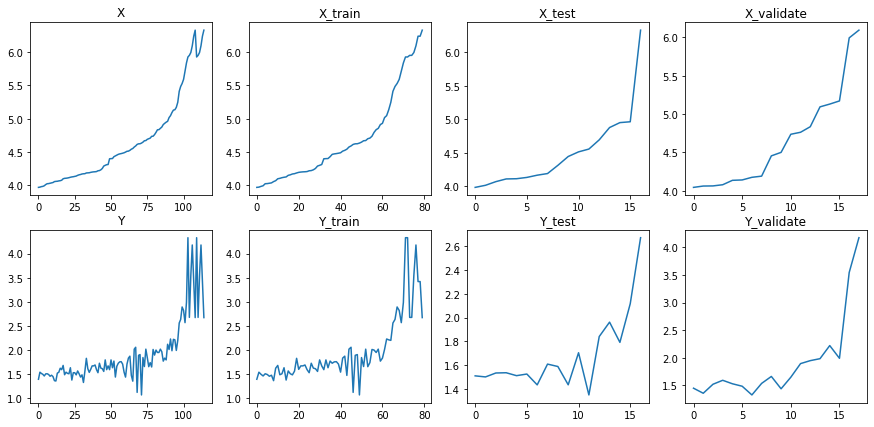

In [269]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax[0][0].plot(X)
ax[0][0].set_title('X')
ax[0][1].plot(X_train)
ax[0][1].set_title('X_train')
ax[0][2].plot(X_test)
ax[0][2].set_title('X_test')
ax[0][3].plot(X_validate)
ax[0][3].set_title('X_validate')

ax[1][0].plot(Y)
ax[1][0].set_title('Y')
ax[1][1].plot(Y_train)
ax[1][1].set_title('Y_train')
ax[1][2].plot(Y_test)
ax[1][2].set_title('Y_test')
ax[1][3].plot(Y_validate)
ax[1][3].set_title('Y_validate')

## Linear Regression Model

In [270]:
# find model by using linear regression:
linear_regression_model = linearRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = linear_regression_model.predict(X_train)
Y_validate_pred = linear_regression_model.predict(X_validate)
Y_test_pred = linear_regression_model.predict(X_test)

# Calculate RMSE on train and test data:
train_linear_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
validate_linear_rmse = np.sqrt(mean_squared_error(Y_validate, Y_validate_pred))
test_linear_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))


Linear Regression Model: 


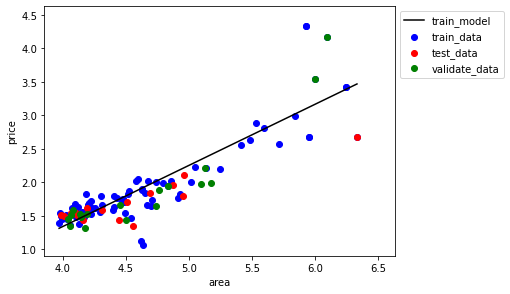

In [271]:
print("\nLinear Regression Model: ")
# Plot linear model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(right=max_area+0.3)
plt.ylim(top=max_price+0.3)
plt.show()

In [272]:
# Linear Model coefficient and intercept:
print("Linear model coefficient: {}".format(linear_regression_model.coef_))
print("Linear model intercept: {}".format(linear_regression_model.intercept_))

# linear_model rmse:
print("Linear model rmse on train data: {}".format(train_linear_rmse))
print("Linear model rmse on validate data: {}".format(validate_linear_rmse))
print("Linear model rmse on test data: {}".format(test_linear_rmse))
print("\n\n")

Linear model coefficient: [[0.91406896]]
Linear model intercept: [-2.31657494]
Linear model rmse on train data: 0.32004611948491307
Linear model rmse on validate data: 0.31053686487670945
Linear model rmse on test data: 0.2797571123532505





In [273]:
def calcRMSE(model, X, Y):
    return np.sqrt(mean_squared_error(Y, model.predict(X)))

def calcCV(model, X, Y, scoring):
    return np.mean(cross_val_score(model, X, Y, scoring=scoring, cv=5))

## Polynomial Regression Model

In [274]:
def polynomialTransform(dataset, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    dataset_poly = polynomial_features.fit_transform(dataset)
    return dataset_poly

In [275]:
# degree = 2
X_train_poly = polynomialTransform(X_train, 2)
selected_poly_model = linearRegressionModel(X_train_poly, Y_train)

# calc rmse on validate data:
X_validate_poly = polynomialTransform(X_validate, 2)
min_poly_rmse = calcRMSE(selected_poly_model, X_validate_poly, Y_validate)

# Choose model with specific degree:
selected_degree = 2
selected_X_train_poly = X_train_poly

min_degree = 3
max_degree = 100

for i in range(min_degree, max_degree+1):
    X_train_poly = polynomialTransform(X_train, i)
    poly_model = linearRegressionModel(X_train_poly, Y_train)

    # calc rmse on validate data:
    X_validate_poly = polynomialTransform(X_validate, i)
    rmse = calcRMSE(poly_model, X_validate_poly, Y_validate)

    # Try to select the model with minimum rmse:
    if rmse < min_poly_rmse:
        min_poly_rmse = rmse
        selected_poly_model = poly_model
        selected_X_train_poly = X_train_poly
        selected_degree = i
        
print("Polynomial Regression with degree = ", selected_degree)
print("RMSE on validate data: ", min_poly_rmse)
print("Polynomial model coefficient:")
print(selected_poly_model.coef_)
print("Polynomial model intercept: {}\n".format(selected_poly_model.intercept_))

# Predict Y:
Y_train_poly_pred = selected_poly_model.predict(selected_X_train_poly)

Polynomial Regression with degree =  42
RMSE on validate data:  0.13603036806788768
Polynomial model coefficient:
[[-5.91106138e-22 -8.50280776e-22  3.30601048e-22  1.29703279e-23
  -2.73079255e-23  1.66490421e-24 -6.23215405e-25 -1.48815400e-24
  -5.93379871e-23  3.62774745e-33  1.63688356e-32  7.27178816e-32
   3.18368511e-31  1.37445669e-30  5.85224694e-30  2.45722192e-29
   1.01698076e-28  4.14598609e-28  1.66330864e-27  6.55853230e-27
   2.53775645e-26  9.61752225e-26  3.56135463e-25  1.28480814e-24
   4.49950584e-24  1.52277841e-23  4.95190507e-23  1.53590873e-22
   4.49954380e-22  1.22847399e-21  3.06643196e-21  6.79643588e-21
   1.27356010e-20  1.83100385e-20  1.53093190e-20 -3.74752721e-21
  -1.82057070e-20  1.41586049e-20 -4.79505795e-21  9.01268101e-22
  -9.80381147e-23  5.80708643e-24 -1.45586077e-25]]
Polynomial model intercept: [1.52302235]



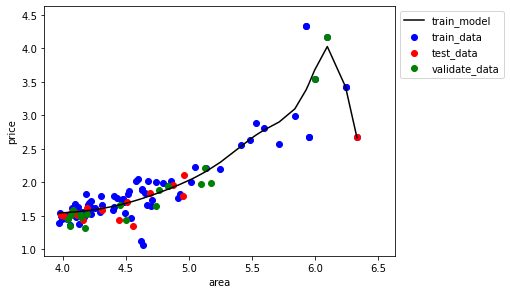

In [276]:
# Plot model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_poly_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(right=max_area+0.3)
plt.ylim(top=max_price+0.3)
plt.show()

### Alpha Hyperparameter

In [277]:
alphas = [0.00001, 0.00003, 0.00005, 0.00008, 0.0001, 0.0003, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.02, 0.04, 0.06, 0.1, 1.0, 3.0, 5.0, 10.0, 50.0, 100.0]

In [278]:
X_validate_poly = polynomialTransform(X_validate, selected_degree)

In [279]:
# ignore warnings: =))) 
import warnings

## Ridge Regression Model

In [280]:
selected_ridge_alpha = alphas[0]
warnings.filterwarnings('ignore')

ridge_model = linear_model.Ridge(alpha=selected_ridge_alpha, fit_intercept=True, normalize=False, max_iter=2000, tol=0.001)
max_ridge_cv_score = calcCV(ridge_model, selected_X_train_poly, Y_train, 'r2')

for alpha in alphas[1:]:
    ridge_model = linear_model.Ridge(alpha=alpha, fit_intercept=True, normalize=False, max_iter=2000, tol=0.001)
    ridge_cv_score = calcCV(ridge_model, selected_X_train_poly, Y_train, 'r2')

    if ridge_cv_score > max_ridge_cv_score:
        max_ridge_cv_score = ridge_cv_score
        selected_ridge_alpha = alpha
        
# fit model with selected alpha:
ridge_model = ridgeRegressionModel(selected_X_train_poly, Y_train, selected_ridge_alpha)

# Ridge max CV score:
print("Ridge max CV score: ", max_ridge_cv_score)

# RMSE:
ridge_rmse = calcRMSE(ridge_model, X_validate_poly, Y_validate)

print("Ridge Regression with alpha = {} and RMSE = {}".format(selected_ridge_alpha, ridge_rmse))
print("Ridge Regression coefficient:")
print(ridge_model.coef_)
print("Ridge Regression intercept: ", ridge_model.intercept_)

# Predict Y with Ridge:
Y_train_ridge_pred = ridge_model.predict(selected_X_train_poly)

Ridge max CV score:  -3688501865376118.5
Ridge Regression with alpha = 1e-05 and RMSE = 0.14374076994857532
Ridge Regression coefficient:
[[-9.82033219e-20  4.01379973e-19  2.25952080e-19  4.02829808e-19
  -6.86092247e-19 -8.79087768e-19 -1.65215115e-19 -5.97757144e-19
  -5.69513719e-19 -2.04374023e-19  8.47123639e-19 -1.79983563e-19
  -8.39665384e-21 -3.26996261e-19  4.06989491e-19  6.06292252e-19
   1.28558092e-18 -7.97683915e-19  4.49265924e-19  4.13821653e-20
   3.83192031e-19 -1.95524247e-19  3.04431803e-19  8.23959873e-19
  -4.99081088e-19 -8.14506764e-19 -3.50156997e-19  6.42620922e-20
   8.72936697e-19 -3.08695182e-19 -6.37096329e-19  9.50044470e-20
   5.00909526e-19  6.70675156e-19 -2.62159472e-19 -6.04095283e-19
   5.75471289e-19 -2.35618307e-19  5.55764368e-20 -8.10056418e-21
   7.24549505e-22 -3.66370798e-23  8.04993154e-25]]
Ridge Regression intercept:  [1.42820513]


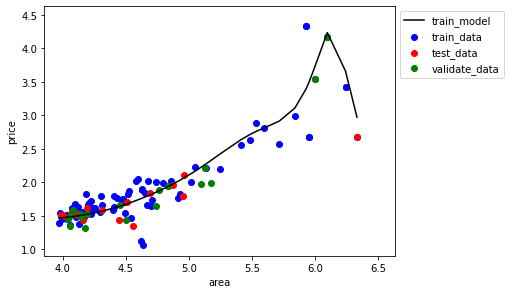

In [281]:
# Plot model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_ridge_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(right=max_area+0.3)
plt.ylim(top=max_price+0.3)
plt.show()

## Lasso Regression Model

In [282]:
selected_lasso_alpha = alphas[0]
warnings.filterwarnings('ignore')

lasso_model = linear_model.Lasso(alpha=selected_lasso_alpha, fit_intercept=True, normalize=True, max_iter=2000, tol=0.001)
max_lasso_cv_score = calcCV(lasso_model, selected_X_train_poly, Y_train, 'r2')

for alpha in alphas[1:]:
    lasso_model = linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=True, max_iter=2000, tol=0.001)
    lasso_cv_score = calcCV(lasso_model, selected_X_train_poly, Y_train, 'r2')
#     neg_root_mean_squared_error

    if lasso_cv_score > max_lasso_cv_score:
        max_lasso_cv_score = lasso_cv_score
        selected_lasso_alpha = alpha
        
# Fit model with selected alpha:
lasso_model = lassoRegressionModel(selected_X_train_poly, Y_train, selected_lasso_alpha)

# Lasso max CV score:
print("Lasso max CV score: ", max_lasso_cv_score)

# RMSE:
lasso_train_rmse = calcRMSE(lasso_model, selected_X_train_poly, Y_train)
lasso_validate_rmse = calcRMSE(lasso_model, X_validate_poly, Y_validate)

print("Lasso Model with alpha = {} and RMSE on validate data = {}".format(selected_lasso_alpha, lasso_validate_rmse))
print("Lasso Model train RMSE: ", lasso_train_rmse)
print("Lasso Regression coefficient:")
print(lasso_model.coef_)
print("Lasso Regression intercept: ", lasso_model.intercept_)

# Predict Y with Ridge:
Y_train_lasso_pred = lasso_model.predict(selected_X_train_poly)

Lasso max CV score:  -0.06894639196772512
Lasso Model with alpha = 0.005 and RMSE on validate data = 0.16066031447930965
Lasso Model train RMSE:  0.25689558089526043
Lasso Regression coefficient:
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  8.72585439e-03
  1.93092625e-04 -3.82074354e-05 -4.27016985e-06 -4.25556042e-07
 -3.46930611e-08 -7.84793878e-10  5.72229812e-10  1.93739073e-10
  4.57439079e-11  9.38909186e-12  1.78117596e-12  3.20386055e-13
  5.53498573e-14  9.25045867e-15  1.50187034e-15  2.37425628e-16
  3.65801607e-17  5.49070482e-18  8.01471347e-19  1.13338781e-19
  1.54197060e-20  1.99254202e-21  2.38359664e-22  2.48321611e-23
  1.81647699e-24 -5.30057286e-26 -6.24261215e-26 -1.83446037e-26
 -4.21396982e-27 -8.67737259e-28 -1.67802039e-28 -3.11381870e-29
 -5.61078782e-30 -9.88860749e-31 -1.71277517e-31 -2.92525427e-32
 -4.93827024e-33 -8.25512567e-34 -1.36842342e-34]
Lasso Regression intercept:  [0.95052034]


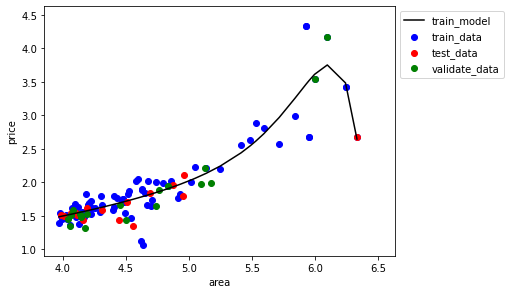

In [283]:
# Plot model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_lasso_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(right=max_area+0.3)
plt.ylim(top=max_price+0.3)
plt.show()

In [284]:
# score the model with test data:
X_test_poly = polynomialTransform(X_test, selected_degree)

# Linear score:
print("\n")

linear_train_r2_score = linear_regression_model.score(X_train, Y_train)
print("Linear Model score on train dataset: ", linear_train_r2_score)

linear_test_r2_score = linear_regression_model.score(X_test, Y_test)
print("Linear Model score on test dataset: ", linear_test_r2_score)

# Poly score:
print("\n")

poly_train_r2_score = selected_poly_model.score(selected_X_train_poly, Y_train)
print("Poly Model score on train dataset: ", poly_train_r2_score)

poly_test_r2_score = selected_poly_model.score(X_test_poly, Y_test)
print("Poly Model score on test dataset: ", poly_test_r2_score)

# Ridge score:
print("\n")

ridge_train_r2_score = ridge_model.score(selected_X_train_poly, Y_train)
print("Ridge Model score on train dataset: ", ridge_train_r2_score)

ridge_test_r2_score = ridge_model.score(X_test_poly, Y_test)
print("Ridge Model score on test dataset: ", ridge_test_r2_score)

# Lasso score:
print("\n")

lasso_train_r2_score = lasso_model.score(selected_X_train_poly, Y_train)
print("Lasso Model score on train dataset: ", lasso_train_r2_score)

lasso_test_r2_score = lasso_model.score(X_test_poly, Y_test)
print("Lasso Model score on test dataset: ", lasso_test_r2_score)



Linear Model score on train dataset:  0.776342253809754
Linear Model score on test dataset:  0.2096181186408339


Poly Model score on train dataset:  0.8588911630183129
Poly Model score on test dataset:  0.8425746207583451


Ridge Model score on train dataset:  0.8482558480663251
Ridge Model score on test dataset:  0.7891092415242785


Lasso Model score on train dataset:  0.8558973127076238
Lasso Model score on test dataset:  0.824808442171646


In [285]:
# # calc cross validation score of linear to compare with poly for best model selection
# linear_cv = np.mean(cross_val_score(linear_model, X, Y, cv=5))
# poly_cv = np.mean(cross_val_score(poly_model, X, Y, cv=5))

# best_r2_score = linear_test_r2_score if linear_test_r2_score > poly_test_r2_score else poly_test_r2_score
# best_model = linear_model if linear_cv > poly_cv else poly_model
# best_degree = 1 if linear_cv > poly_cv else degree

# print(linear_cv)
# print(poly_cv)

In [286]:
import unidecode
post_type = unidecode.unidecode(post_type.lower().replace(" ", ""))
street = unidecode.unidecode(street.lower().replace(" ", ""))
ward = unidecode.unidecode(ward.lower().replace(" ", ""))
district = unidecode.unidecode(district.lower().replace(" ", ""))
model_name = post_type + "_" + street + "_" + ward + "_" + district

In [287]:
model_name

'bandat_vuonlai_anphudong_12'

In [288]:
# # Save model after training for later use:
# from joblib import dump, load

# if best_r2_score > 0.7:
#     # Save model:
#     dump((best_model, best_degree), 'trained\\' + model_name + '.joblib')

In [289]:
# try:    
#     # load model:
#     loaded_model, loaded_degree = load('trained/' + model_name + ".joblib")

#     test_area = np.array([92.00])
#     test_area = test_area[:, np.newaxis]
#     test_area = FunctionTransformer(np.log1p).fit_transform(test_area)

#     if loaded_degree == 1:
#         predicted_price = loaded_model.predict(test_area)
#     else:
#         test_area_poly = PolynomialFeatures(degree=loaded_degree).fit_transform(test_area)
#         predicted_price = loaded_model.predict(test_area_poly)

#     print(FunctionTransformer(np.log1p).inverse_transform(predicted_price))
# except FileNotFoundError:
#     print("Model not found or trained result is low!")